**Different scenarios in Optimization**

**Convergence and Divergence**

Author: Dr. Konda Reddy Mopuri\
Department of Artificial Intelligence, IIT Hyderabad\
Date: January 2024\
Licence: MIT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [ ]:
### the following modules are taken from (for annotating)
### https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c  ####


from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)


def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [ ]:
### the following modules are taken from (for drawing 3D arrows) ###
### https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c  ####

from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs)

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

In [ ]:
 # Quadratic function 4x^2+y^2
def f(x,y):
  return 4*(x)**2+y**2

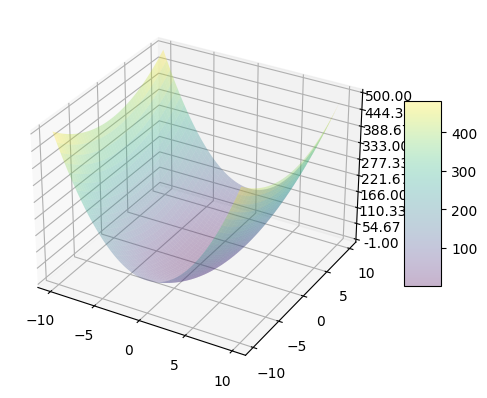

In [ ]:
######   plot a function of two variables x, y    ######

X = np.arange(-10, 10, 0.05)
Y = np.arange(-10, 10, 0.05)
X, Y = np.meshgrid(X, Y)
Z = 4*(X**2)+1*(Y**2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plottin the function
surf = ax.plot_surface(X, Y, Z,   cmap='viridis', alpha=0.3, linewidth=0, antialiased=True, shade=True)

# Customize the z axis.
ax.set_zlim(-1, 500)
ax.zaxis.set_major_locator(LinearLocator(10))

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Text(0.5, 1.0, 'Contours of the function')

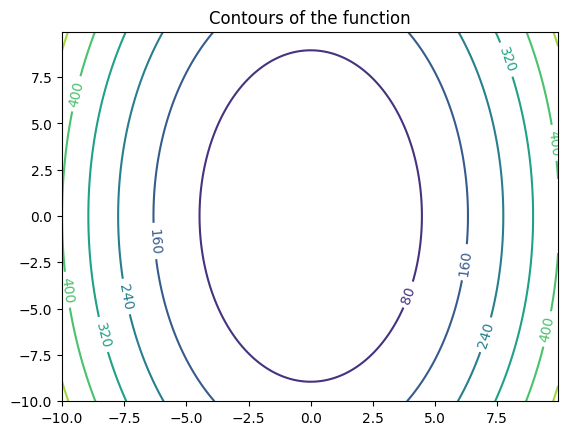

In [ ]:
###  let's now plot the contours of the function  ###

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Contours of the function')

In [ ]:
# Derivatives of our quadratic function

def df(x_k,y_k):
  return (8*(x_k), 2*(y_k))

def df2(x_k,y_k):
  return (8,2)

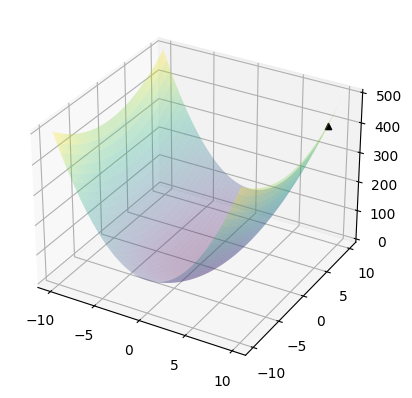

In [ ]:
######   plot a function of two variables x, y    ######

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plottin the function
surf = ax.plot_surface(X, Y, Z,   cmap='viridis', alpha=0.3, linewidth=0, antialiased=True, shade=True)

# Customize the z axis.
ax.set_zlim(-1, 500)

x0 = 9
y0 = 9

ax.scatter(x0,y0,f(x0,y0),marker='^',color='black')
plt.show()

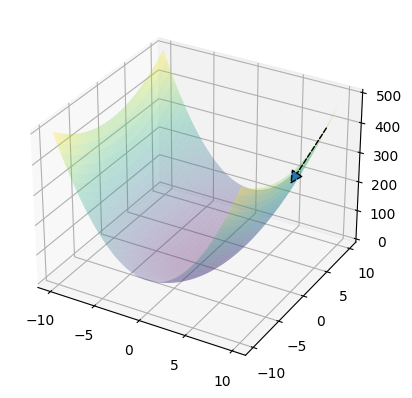

In [ ]:
#############################
### Convergence Scenario ####
#############################

######   plot a function of two variables x, y    ######

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plottin the function
surf = ax.plot_surface(X, Y, Z,  cmap='viridis', alpha=0.3, linewidth=0, antialiased=True, shade=True)

# Customize the z axis.
ax.set_zlim(-1, 500)

x0 = 9
y0 = 9

eta = 0.05
# notice that the eta is less than eta_min (1/8 = 0.125)

x1 = x0 - eta*df(x0,y0)[0]
y1 = y0 - eta*df(x0,y0)[1]

ax.arrow3D(x0,y0,f(x0,y0),
           x1-x0,y1-y0,f(x1,y1)-f(x0,y0),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

plt.show()

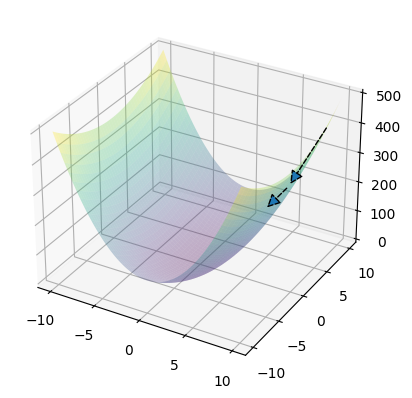

In [ ]:
#############################
### Convergence Scenario ####
#############################

######   plot a function of two variables x, y    ######

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plottin the function
surf = ax.plot_surface(X, Y, Z,  cmap='viridis', alpha=0.3, linewidth=0, antialiased=True, shade=True)

# Customize the z axis.
ax.set_zlim(-1, 500)

x2 = x1 - eta*df(x1,y1)[0]
y2 = y1 - eta*df(x1,y1)[1]

ax.arrow3D(x0,y0,f(x0,y0),
           x1-x0,y1-y0,f(x1,y1)-f(x0,y0),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

ax.arrow3D(x1,y1,f(x1,y1),
           x2-x1,y2-y1,f(x2,y2)-f(x1,y1),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

plt.show()



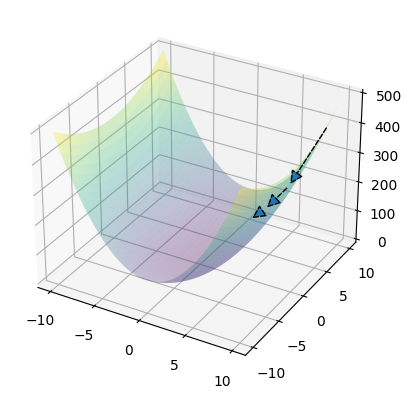

In [ ]:
#############################
### Convergence Scenario ####
#############################

######   plot a function of two variables x, y    ######

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plottin the function
surf = ax.plot_surface(X, Y, Z,  cmap='viridis', alpha=0.3, linewidth=0, antialiased=True, shade=True)

# Customize the z axis.
ax.set_zlim(-1, 500)

x3 = x2 - eta*df(x2,y2)[0]
y3 = y2 - eta*df(x2,y2)[1]

ax.arrow3D(x0,y0,f(x0,y0),
           x1-x0,y1-y0,f(x1,y1)-f(x0,y0),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

ax.arrow3D(x1,y1,f(x1,y1),
           x2-x1,y2-y1,f(x2,y2)-f(x1,y1),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

ax.arrow3D(x2,y2,f(x2,y2),
           x3-x2,y3-y2,f(x3,y3)-f(x2,y2),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

plt.show()



In [ ]:
print(x0, y0)
print(round(x1,2),round(y1,2))
print(round(x2,2),round(y2,2))
print(round(x3,2),round(y3,2))
print('Note that the minimum is at (0,0)')

9 9
5.4 8.1
3.24 7.289999999999999
1.944 6.560999999999999


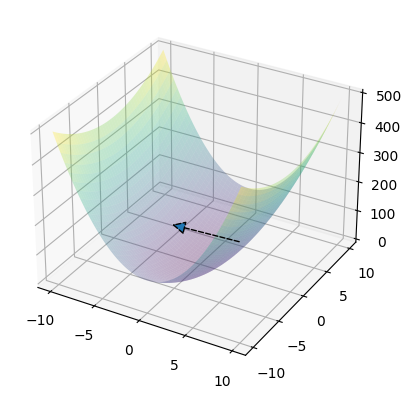

In [ ]:
#############################
### Divergence Scenario ####
#############################

######   plot a function of two variables x, y    ######

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plottin the function
surf = ax.plot_surface(X, Y, Z,  cmap='viridis', alpha=0.3, linewidth=0, antialiased=True, shade=True)

# Customize the z axis.
ax.set_zlim(-1, 500)

x0 = 3
y0 = 3

eta = 0.3
# Note that the eta is greater than the 2*eta_min (0.25)
# but less than that of 2*eta_other (1)

x1 = x0 - eta*df(x0,y0)[0]
y1 = y0 - eta*df(x0,y0)[1]

ax.arrow3D(x0,y0,f(x0,y0),
           x1-x0,y1-y0,f(x1,y1)-f(x0,y0),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

plt.show()

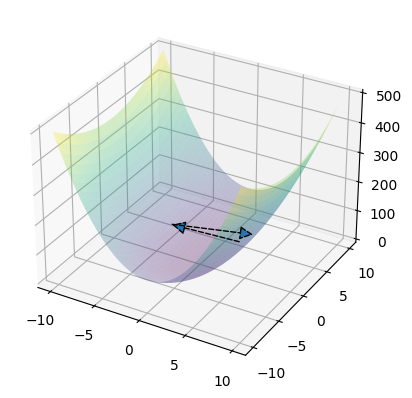

In [ ]:
#############################
### Divergence Scenario ####
#############################

######   plot a function of two variables x, y    ######

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plottin the function
surf = ax.plot_surface(X, Y, Z,  cmap='viridis', alpha=0.3, linewidth=0, antialiased=True, shade=True)

# Customize the z axis.
ax.set_zlim(-1, 500)

x2 = x1 - eta*df(x1,y1)[0]
y2 = y1 - eta*df(x1,y1)[1]

ax.arrow3D(x0,y0,f(x0,y0),
           x1-x0,y1-y0,f(x1,y1)-f(x0,y0),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

ax.arrow3D(x1,y1,f(x1,y1),
           x2-x1,y2-y1,f(x2,y2)-f(x1,y1),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

plt.show()



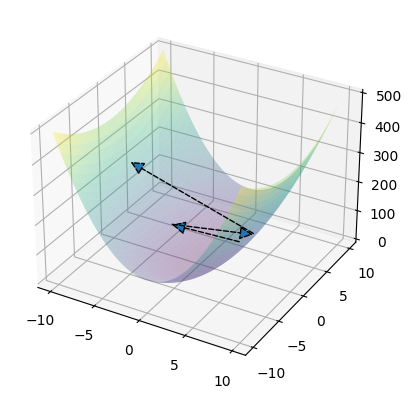

In [ ]:
#############################
### Divergence Scenario ####
#############################

######   plot a function of two variables x, y    ######

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plottin the function
surf = ax.plot_surface(X, Y, Z,  cmap='viridis', alpha=0.3, linewidth=0, antialiased=True, shade=True)

# Customize the z axis.
ax.set_zlim(-1, 500)

x3 = x2 - eta*df(x2,y2)[0]
y3 = y2 - eta*df(x2,y2)[1]

ax.arrow3D(x0,y0,f(x0,y0),
           x1-x0,y1-y0,f(x1,y1)-f(x0,y0),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

ax.arrow3D(x1,y1,f(x1,y1),
           x2-x1,y2-y1,f(x2,y2)-f(x1,y1),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

ax.arrow3D(x2,y2,f(x2,y2),
           x3-x2,y3-y2,f(x3,y3)-f(x2,y2),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')

plt.show()



In [ ]:
print(x0, y0)
print(round(x1,2),round(y1,2))
print(round(x2,2),round(y2,2))
print(round(x3,2),round(y3,2))
print('Note that the minimum is at (0,0)')

3 3
-4.2 1.2
5.88 0.48
-8.23 0.19
Note that the minimum is at (0,0)


**Jittering**\
Note that there is another scenario known as the jittering which refers to small, random fluctuations or oscillations in the updates made to the model parameters during training. It can be caused by various factors such as larger learning rate, improperly scaled features in the data, noisy data, etc.